## SGD for FM
目标函数
![](img_fm/1.png)
加入正则项，防止过拟合
![](img_fm/2.png)
Algorithm for SGD
![](img_fm/3.png)
![](img_fm/4.png)

> numpy's dot function does not have native support for handling sparse matrices. What is happening is numpy thinks of the sparse matrix C as a python object

### load data

In [1]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer
import math
import matplotlib.pyplot as plt
# Read in data
def loadData(filename,path="ml-100k/"):
    data = []
    y = []
    users=set()
    items=set()
    with open(path+filename) as f:
        for line in f:
            (user,movieid,rating,ts)=line.split('\t')
            data.append({ "user_id": str(user), "movie_id": str(movieid)})
            y.append(float(rating))
            users.add(user)
            items.add(movieid)

    return (data, np.array(y), users, items)

### 使用SGD训练FM

In [83]:
class FM_SGD():
    
    def __init__(self,
                iter_num,
                learning_rate,
                factors_num,
                reg,
                verbose = True):
        
        # 迭代次数
        self.iter_num = iter_num
        
        #学习速率
        self.learning_rate = learning_rate
        
        # 分解器feature个数
        self.factors_num = factors_num
        
        # lambda
        self.reg = reg
        
        # 输出执行信息
        self.verbose = verbose
        
        # global bias
        self.w0 = 0;
        
        # feature bias
        self.W = 0;
        
        # feature
        self.V = 0;
        
        # 训练过程中的mse
        self.mse = []
        
        # target y的最大值与最小值，for prune
        self.y_max = 0.0;
        self.y_min = 0.0;
        
        
    def train(self, X_, y_):
        
        (n,p) = X_.shape
        
        self.mse = []
        
        # global bias
        self.w0 = sum(np.random.rand(1))  # bias
        
        # feature bias
        self.W = 1e-5*np.random.rand(1,p)
        
        # feature
        self.V = 1e-5*np.random.rand(p,self.factors_num)
        
        self.y_max = np.max(y_)
        self.y_min = np.min(y_)
        
        for j in xrange(self.iter_num):
            
            loss_sgd = []

            # shuffle
            reidx = np.random.permutation(n)
            X_train = X_[reidx,:]
            y_train = y_[reidx]

            

            for i in xrange(n):

                if self.verbose and i%1000 ==0:
                    print 'prossing ' + str(i) + 'th sample...'

                X = X_train[i,:]
                y = y_train[i]

                # too slow
            #     y_predict = (w0 + W*X.T + ((X.T*X).multiply((np.triu(V.dot(V.T),1)))).sum().sum())[0,0]

                tmp = np.sum(X.T.multiply(self.V),axis=0)
                factor_part = (np.sum(np.multiply(tmp,tmp)) - np.sum((X.T.multiply(X.T)).multiply(np.multiply(self.V,self.V))))/2
                y_predict = self.w0 + np.sum(self.W*X.T) + factor_part
                
#                 print y_predict

                # prune
                if y_predict < self.y_min:
                    y_predict = self.y_min

                if y_predict > self.y_max:
                    y_predict = self.y_max

                diff = y_predict-y
                loss_sgd.append(math.pow(diff,2))

                # update mse
                self.mse.append(sum(loss_sgd)/len(loss_sgd))

                # update w0
                self.w0 = self.w0 - self.learning_rate*2*diff * (1)
                
                # update W
                self.W = self.W - self.learning_rate*2*diff * (X)
                
                # update V
                self.V = self.V - self.learning_rate * 2*diff* (X.T.multiply((np.tile(X*self.V,(p,1)) - X.T.multiply(self.V))))

    def validate(self, X_, y_):
        (n,p) = X_.shape
        
        mse = []
        

        for i in xrange(n):

            if self.verbose and i%1000 ==0:
                print 'prossing ' + str(i) + 'th sample...'

            X = X_train[i,:]
            y = y_train[i]

            # too slow
        #     y_predict = (w0 + W*X.T + ((X.T*X).multiply((np.triu(V.dot(V.T),1)))).sum().sum())[0,0]

            tmp = np.sum(X.T.multiply(self.V),axis=0)
            factor_part = (np.sum(np.multiply(tmp,tmp)) - np.sum((X.T.multiply(X.T)).multiply(np.multiply(self.V,self.V))))/2
            y_predict = self.w0 + np.sum(self.W*X.T) + factor_part

#                 print y_predict

            # prune
            if y_predict < self.y_min:
                y_predict = self.y_min

            if y_predict > self.y_max:
                y_predict = self.y_max

            diff = y_predict-y
            loss_sgd.append(math.pow(diff,2))

            # update mse
            mse.append(sum(loss_sgd)/len(loss_sgd))
        return mse

In [106]:
(train_data, y_train, train_users, train_items) = loadData("ua.base")
(test_data, y_test, test_users, test_items) = loadData("ua.test")

v = DictVectorizer()
X_train = v.fit_transform(train_data)
X_test = v.transform(test_data)
fm_sgd = FM_SGD(iter_num=1,
               learning_rate=0.01,
               factors_num=10,
               reg=0.1)
fm_sgd.train(X_train,y_train)

prossing 0th sample...
prossing 1000th sample...
prossing 2000th sample...
prossing 3000th sample...
prossing 4000th sample...
prossing 5000th sample...
prossing 6000th sample...
prossing 7000th sample...
prossing 8000th sample...
prossing 9000th sample...
prossing 10000th sample...
prossing 11000th sample...
prossing 12000th sample...
prossing 13000th sample...
prossing 14000th sample...
prossing 15000th sample...
prossing 16000th sample...
prossing 17000th sample...
prossing 18000th sample...
prossing 19000th sample...
prossing 20000th sample...
prossing 21000th sample...
prossing 22000th sample...
prossing 23000th sample...
prossing 24000th sample...
prossing 25000th sample...
prossing 26000th sample...
prossing 27000th sample...
prossing 28000th sample...
prossing 29000th sample...
prossing 30000th sample...


AttributeError: 'numpy.ndarray' object has no attribute '_collapse'

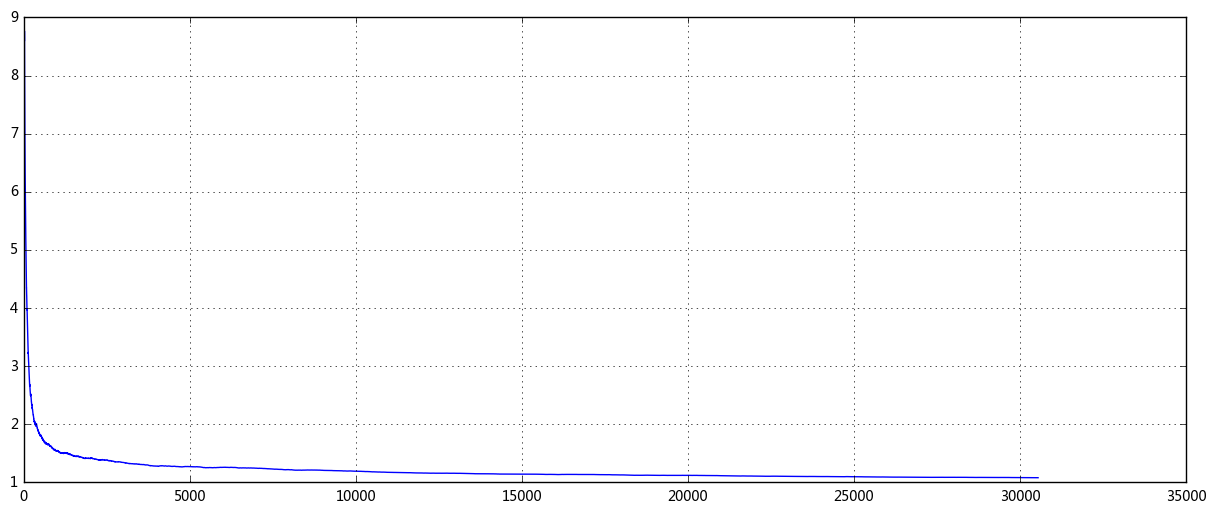

In [107]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15,6
plt.grid(True)
plt.plot(fm_sgd.mse)

In [384]:
mse = fm_sgd.validate(X_test,y_test)

prossing 0th sample...
prossing 1000th sample...
prossing 2000th sample...
prossing 3000th sample...
prossing 4000th sample...
prossing 5000th sample...
prossing 6000th sample...
prossing 7000th sample...
prossing 8000th sample...
prossing 9000th sample...


In [ ]:
plt.grid(True)
plt.plot(mse

### 使用ADAGRAD 训练FM

In [71]:
class FM_ADAGRAD():
    
    def __init__(self,
                iter_num,
                learning_rate,
                factors_num,
                reg,
                verbose = True):
        
        # 迭代次数
        self.iter_num = iter_num
        
        #学习速率
        self.learning_rate = learning_rate
        
        # 分解器feature个数
        self.factors_num = factors_num
        
        # lambda
        self.reg = reg
        
        # 输出执行信息
        self.verbose = verbose
        
        # global bias
        self.w0 = 0;
        
        # feature bias
        self.W = 0;
        
        # feature
        self.V = 0;
        
        # 训练过程中的mse
        self.mse = []
        
        # target y的最大值与最小值，for prune
        self.y_max = 0.0;
        self.y_min = 0.0;
        
        
    def train(self, X_, y_):
        
        (n,p) = X_.shape
        
        self.mse = []
        
        # global bias
        self.w0 = sum(np.random.rand(1))  # bias
        
        # feature bias
        self.W = 1e-5*np.random.rand(1,p)
        
        # feature
        self.V = 1e-5*np.random.rand(p,self.factors_num)
        
        self.y_max = np.max(y_)
        self.y_min = np.min(y_)
        
        # keep track of all parameters 
        w0_gradients = 0.0;
        W_gradients = np.zeros((1,p))
        V_gradients = np.zeros((p,self.factors_num))
        
        # avoid 0 numerator
        epison = 1e-5 
        
        for j in xrange(self.iter_num):
            
            loss_sgd = []

            # shuffle
            reidx = np.random.permutation(n)
            X_train = X_[reidx,:]
            y_train = y_[reidx]

            

            for i in xrange(n):

                if self.verbose and i%1000 ==0:
                    print 'prossing ' + str(i) + 'th sample...'

                X = X_train[i,:]
                y = y_train[i]

                # too slow
            #     y_predict = (w0 + W*X.T + ((X.T*X).multiply((np.triu(V.dot(V.T),1)))).sum().sum())[0,0]

                tmp = np.sum(X.T.multiply(self.V),axis=0)
                factor_part = (np.sum(np.multiply(tmp,tmp)) - np.sum((X.T.multiply(X.T)).multiply(np.multiply(self.V,self.V))))/2
                y_predict = self.w0 + np.sum(self.W*X.T) + factor_part
                
#                 print y_predict

                # prune
                if y_predict < self.y_min:
                    y_predict = self.y_min

                if y_predict > self.y_max:
                    y_predict = self.y_max

                diff = y_predict-y
                loss_sgd.append(math.pow(diff,2))

                # update mse
                self.mse.append(sum(loss_sgd)/len(loss_sgd))

                # update w0
                gradient = 2*diff * (1)
                w0_gradients += np.square(gradient)
                self.w0 = self.w0 - self.learning_rate/np.sqrt(w0_gradients+epison)*gradient
                
                
                # update W
                gradient = 2*diff * (X)
                W_gradients += gradient.multiply(gradient)
                self.W = self.W - gradient.multiply(self.learning_rate/np.sqrt(W_gradients+epison))
                
#                 print W_gradients.shape
#                 print gradient.shape
                
                
                
                # update V
                gradient = 2*diff* (X.T.multiply((np.tile(X*self.V,(p,1)) - X.T.multiply(self.V))))
                V_gradients += np.multiply(gradient,gradient)
                self.V = self.V - np.multiply(self.learning_rate/np.sqrt(V_gradients+epison),gradient)
                

    def validate(self, X_, y_):
        (n,p) = X_.shape
        
        mse = []
        

        for i in xrange(n):

            if self.verbose and i%1000 ==0:
                print 'prossing ' + str(i) + 'th sample...'

            X = X_train[i,:]
            y = y_train[i]

            # too slow
        #     y_predict = (w0 + W*X.T + ((X.T*X).multiply((np.triu(V.dot(V.T),1)))).sum().sum())[0,0]

            tmp = np.sum(X.T.multiply(self.V),axis=0)
            factor_part = (np.sum(np.multiply(tmp,tmp)) - np.sum((X.T.multiply(X.T)).multiply(np.multiply(self.V,self.V))))/2
            y_predict = self.w0 + np.sum(self.W*X.T) + factor_part

#                 print y_predict

            # prune
            if y_predict < self.y_min:
                y_predict = self.y_min

            if y_predict > self.y_max:
                y_predict = self.y_max

            diff = y_predict-y
            loss_sgd.append(math.pow(diff,2))

            # update mse
            mse.append(sum(loss_sgd)/len(loss_sgd))
        return mse

In [104]:
(train_data, y_train, train_users, train_items) = loadData("ua.base")
(test_data, y_test, test_users, test_items) = loadData("ua.test")

v = DictVectorizer()
X_train = v.fit_transform(train_data)
X_test = v.transform(test_data)
fm_adagrad = FM_ADAGRAD(iter_num=1,
               learning_rate=0.2,
               factors_num=10,
               reg=0.1)
fm_adagrad.train(X_train,y_train)

prossing 0th sample...
prossing 1000th sample...
prossing 2000th sample...
prossing 3000th sample...
prossing 4000th sample...
prossing 5000th sample...
prossing 6000th sample...
prossing 7000th sample...
prossing 8000th sample...
prossing 9000th sample...
prossing 10000th sample...
prossing 11000th sample...
prossing 12000th sample...
prossing 13000th sample...
prossing 14000th sample...
prossing 15000th sample...
prossing 16000th sample...
prossing 17000th sample...
prossing 18000th sample...
prossing 19000th sample...
prossing 20000th sample...
prossing 21000th sample...
prossing 22000th sample...
prossing 23000th sample...
prossing 24000th sample...
prossing 25000th sample...
prossing 26000th sample...
prossing 27000th sample...
prossing 28000th sample...
prossing 29000th sample...
prossing 30000th sample...
prossing 31000th sample...
prossing 32000th sample...


KeyboardInterrupt: 

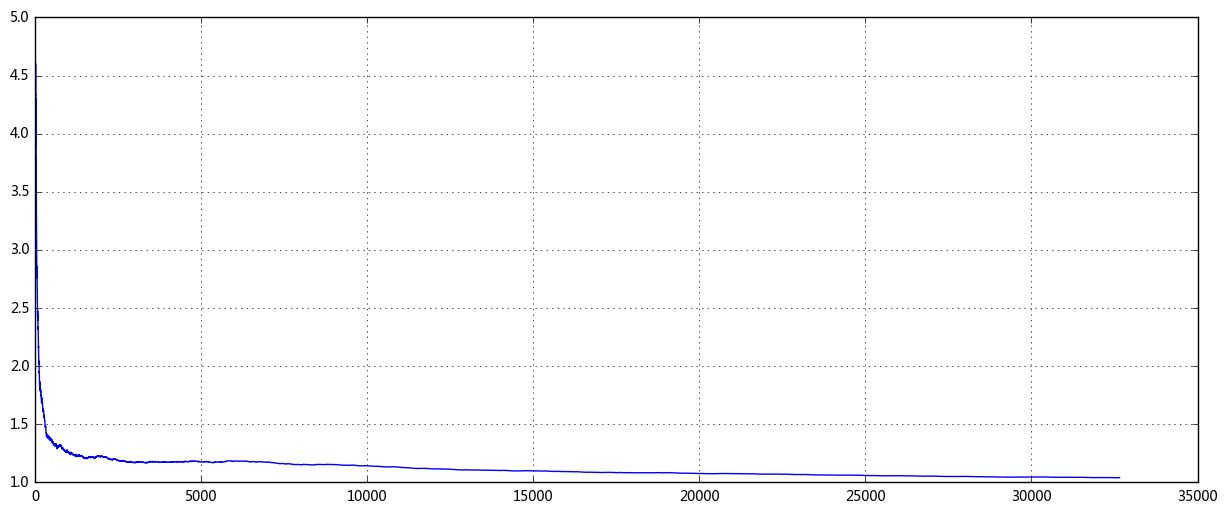

In [105]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15,6
plt.grid(True)
plt.plot(fm_adagrad.mse)

In [42]:
X = X_train[0,:]

In [45]:
X * b

ValueError: dimension mismatch

In [44]:
b = np.zeros(X.shape)

In [46]:
X.shape

(1, 2623)

In [47]:
b.shape

(1L, 2623L)

In [54]:
X

<1x2623 sparse matrix of type '<type 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [55]:
np.square(X)

ValueError: dimension mismatch